### Mediapipe Motion Tracking

###### https://developers.google.com/mediapipe/solutions/vision/pose_landmarker 참고

In [2]:
import cv2
import mediapipe as mp
import time

mp_drawing = mp.solutions.drawing_utils  # mediapipe의 drawing class 초기화
mp_pose = mp.solutions.pose  # pose class 초기화
pose = mp_pose.Pose()  # mp.solutions.pose.Pose()
# pose = mp_pose.Pose(min_pose_detection_confidence=0.3)
# min_pose_detection_confidence : 정답으로 예측하는 범위의 최소 감지 신뢰도(예측 점수를 기준으로 결과를 필터링 함)

In [17]:
cap = cv2.VideoCapture('example.mp4')  # 영상 읽어오기
present_time = 0

while True:
  ret, img = cap.read()
  imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 읽어온 이미지를 RGB 형식으로 전환
  results = pose.process(imgRGB)  # 이미지 탐지

  if results.pose_landmarks: # 특징점 추출, pose_landmark는 신체 부위의 대략적 위치를 나타내는 랜드마크 위치를 추적함
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS) 
    # results.pose_landmarks : 특징점 추출 / mp_pose.POSE_CONNECTIONS : 특징점 연결
    for id, landmark in enumerate(results.pose_landmarks.landmark):
      h,w,c = img.shape
      # print(id, landmark)
      cx, cy = int(landmark.x*w), int(landmark.y*h)
      # print(cx, cy)
      cv2.circle(img, (cx, cy), 5, (255,0,0), cv2.FILLED) # landmark 부위 동그라미로 지정

  current_time=time.time()
  fps=1/(current_time-present_time)
  present_time=current_time

  cv2.putText(img, str(int(fps)), (70,50), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,0), 3)
  cv2.imshow('image', img)
  cv2.waitKey(1)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


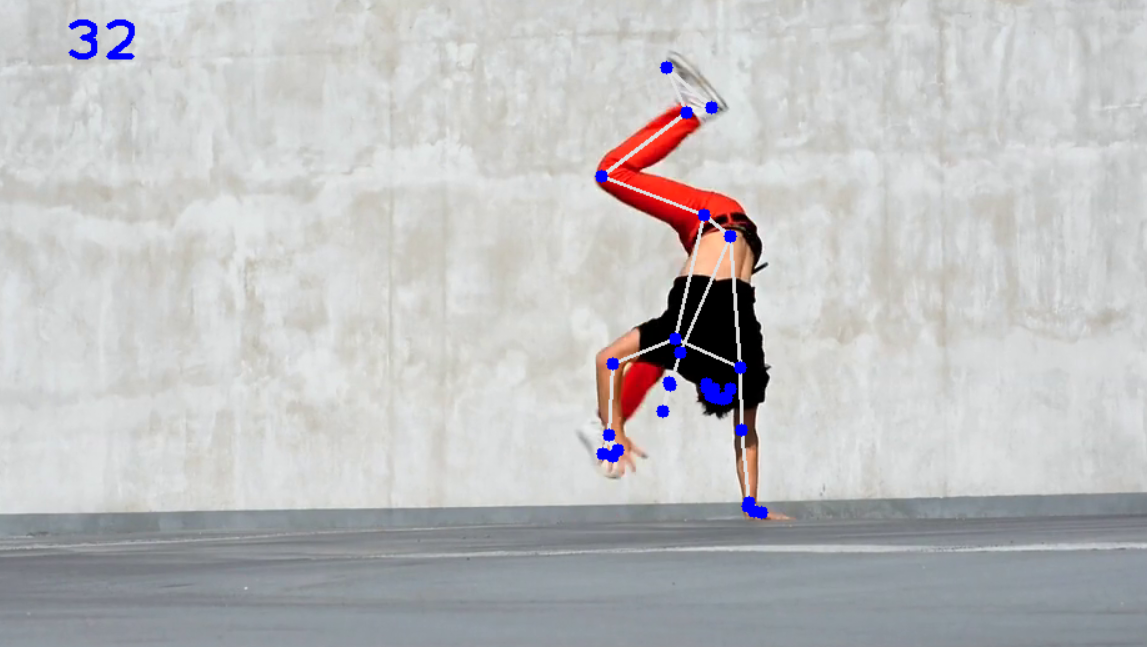

In [13]:
cap = cv2.VideoCapture('example.mp4')
present_time = 0

while True:
  ret, img = cap.read()
  imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  results = pose.process(imgRGB)
  # print(results.pose_landmarks)
  # print(mp_pose.POSE_CONNECTIONS)

  if results.pose_landmarks:
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    print(results.pose_landmarks.landmark)

[x: 0.4800867438316345
y: 0.4786069095134735
z: -0.687511682510376
visibility: 0.9999233484268188
, x: 0.4888051450252533
y: 0.47164806723594666
z: -0.6904739141464233
visibility: 0.9999391436576843
, x: 0.4887655973434448
y: 0.4707932770252228
z: -0.6905151009559631
visibility: 0.9999290704727173
, x: 0.4885158836841583
y: 0.470330148935318
z: -0.6907681226730347
visibility: 0.9999265670776367
, x: 0.4877210259437561
y: 0.4730077385902405
z: -0.6816218495368958
visibility: 0.9999464154243469
, x: 0.48661506175994873
y: 0.47293558716773987
z: -0.6815915703773499
visibility: 0.9999341368675232
, x: 0.4847868084907532
y: 0.47317036986351013
z: -0.6815520524978638
visibility: 0.9999367594718933
, x: 0.4802028238773346
y: 0.4683665633201599
z: -0.6053320169448853
visibility: 0.9999005198478699
, x: 0.46084123849868774
y: 0.4695293605327606
z: -0.5647194385528564
visibility: 0.9999270439147949
, x: 0.4647555649280548
y: 0.47904136776924133
z: -0.644480288028717
visibility: 0.999760150909423

KeyboardInterrupt: 